# Credit Card Transactions Fraud Detection

# 1. Importing the libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 2. Reading the data

In [105]:
# Loading the Data
credit_df = pd.read_csv('fraudTrain.csv') # -> train dataset

credit_test_df = pd.read_csv('fraudTest.csv') # -> test dataset

# 3. Checking the data

In [106]:
# Previewing the top of our train dataset
credit_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [107]:
# Previewing the bottom of our train dataset
credit_df.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [108]:
# Previewing the top of our test dataset
credit_test_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [109]:
# Previewing the bottom of our test dataset
credit_test_df.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [110]:
#Checking the shape
print(f'The train set has {credit_df.shape} rows and columns')

The train set has (1296675, 23) rows and columns


In [111]:
#Checking the shape
print(f'The test set has {credit_test_df.shape} rows and columns')

The test set has (555719, 23) rows and columns


In [112]:
# Checking whether each column has an appropriate datatype
credit_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [113]:
# Checking whether each column has an appropriate datatype
credit_test_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [114]:
# Checking for duplicates
credit_df.duplicated().sum()

0

In [115]:
# Checking the info 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [116]:
# Describing the data
credit_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [117]:
#checking null values
credit_test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [118]:
# Checking for duplicates
credit_test_df.duplicated().sum()

0

In [119]:
# Checking the info 
credit_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [120]:
# Describing the data
credit_test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [121]:
# Value counts for each column in train dataset
for col in credit_df.columns[1:]:
    print('\n' + col + '\n')
    print(credit_df[col].value_counts())


trans_date_trans_time

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

cc_num

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

merchant

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
frau

In [122]:
# Value counts for each column in train dataset
for col in credit_test_df.columns[1:]:
    print('\n' + col + '\n')
    print(credit_test_df[col].value_counts())


trans_date_trans_time

2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
                      ..
2020-08-25 13:15:57    1
2020-08-25 13:15:37    1
2020-08-25 13:15:22    1
2020-08-25 13:15:12    1
2020-12-31 23:59:34    1
Name: trans_date_trans_time, Length: 544760, dtype: int64

cc_num

6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
                       ... 
4883407061576             9
4087542780207162          9
3540416671210051          8
4352307151555405069       7
4295296907373             6
Name: cc_num, Length: 924, dtype: int64

merchant

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 

# 4. Data Cleaning

In [123]:
# Dropping the unnamed column
credit_df.drop(credit_df.columns[0], axis=1, inplace=True)
credit_test_df.drop(credit_test_df.columns[0], axis=1, inplace=True)

In [124]:
# Converting date columns to datetime format
credit_df['trans_date_trans_time']=pd.to_datetime(credit_df['trans_date_trans_time'])

# converting the train
credit_df['trans_date']=credit_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credit_df['trans_date']=pd.to_datetime(credit_df['trans_date'])
credit_df['dob']=pd.to_datetime(credit_df['dob'])

# converting the test
credit_test_df['trans_date_trans_time']=pd.to_datetime(credit_test_df['trans_date_trans_time'])
credit_test_df['trans_date']=credit_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credit_test_df['trans_date']=pd.to_datetime(credit_test_df['trans_date'])
credit_test_df['dob']=pd.to_datetime(credit_test_df['dob'])

In [125]:
# Separate date and time components into separate columns

credit_df['trans_time'] = credit_df['trans_date_trans_time'].dt.time
credit_test_df['trans_time'] = credit_test_df['trans_date_trans_time'].dt.time
credit_df['hour'] = credit_df['trans_date_trans_time'].dt.hour
credit_test_df['hour'] = credit_test_df['trans_date_trans_time'].dt.hour

In [126]:
# creating a transaction date column
credit_df['trans_month'] = credit_df['trans_date'].dt.month
credit_test_df['trans_month'] = credit_test_df['trans_date'].dt.month

In [127]:
#dropping the trans_date_trans_time column
credit_df = credit_df.drop(columns='trans_date_trans_time')
credit_test_df = credit_test_df.drop(columns='trans_date_trans_time')

In [128]:
#Checking the new train dataset
credit_df.head(2)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour,trans_month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,0,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,0,1


In [129]:
credit_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'hour', 'trans_month'],
      dtype='object')

In [130]:
#Checking the new test dataset
credit_test_df.head(2)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour,trans_month
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25,12,6
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,12,6


# 6. Exploratory Analysis

## 6.1 The count from each transaction.

<AxesSubplot: title={'center': 'Line graph of transaction amounts'}, xlabel='Amount'>

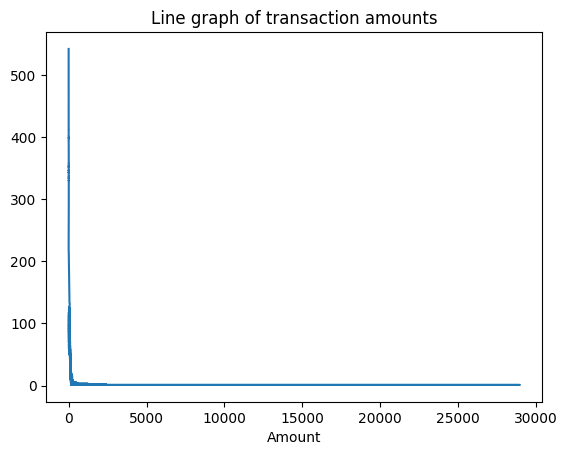

In [131]:
credit_df['amt'].value_counts().plot(kind='line', title='Line graph of transaction amounts', xlabel='Amount')

In [132]:
amt_500_df = credit_df[credit_df['amt'] <= 500]

<AxesSubplot: title={'center': 'Line graph of transaction amounts below $500'}, xlabel='Amount'>

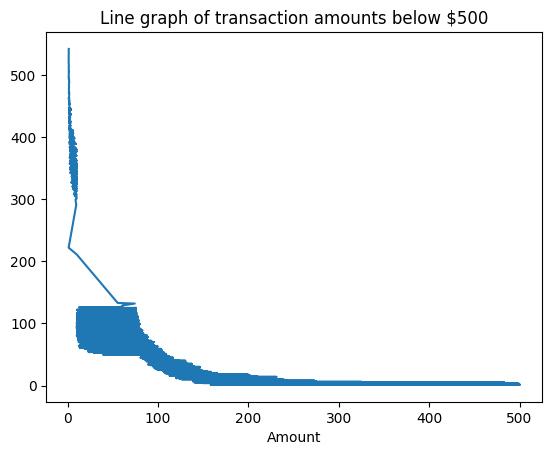

In [133]:
amt_500_df['amt'].value_counts().plot(kind='line', title='Line graph of transaction amounts below $500', xlabel='Amount')

## 6.2 Number of fraud transactions

In [134]:
# Count of fraud transactions
credit_df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<AxesSubplot: title={'center': 'Count of fraud transactions'}, ylabel='Count'>

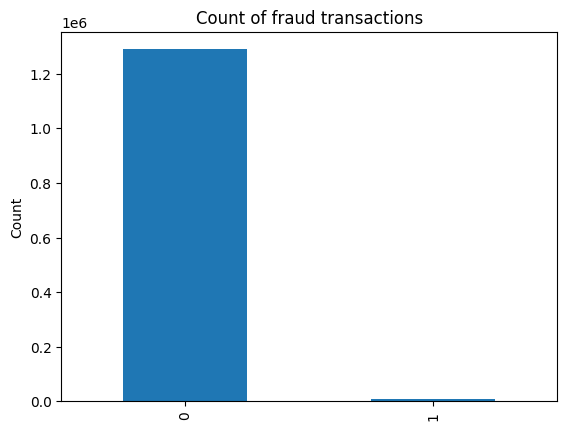

In [135]:
credit_df['is_fraud'].value_counts().plot(kind='bar', title='Count of fraud transactions',\
                                        ylabel='Count')

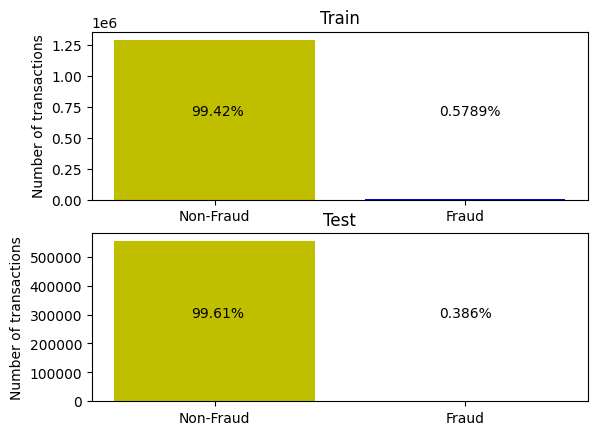

In [136]:
classes_train=credit_df['is_fraud'].value_counts()
normal_share_train=classes_train[0]/credit_df['is_fraud'].count()*100
fraud_share_train=classes_train[1]/credit_df['is_fraud'].count()*100

classes_test=credit_test_df['is_fraud'].value_counts()
normal_share_test=classes_test[0]/credit_test_df['is_fraud'].count()*100
fraud_share_test=classes_test[1]/credit_test_df['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

## 6.3 Number of card holders per street

In [137]:
# Number of card holders per street
credit_df['street'].value_counts()[:20].to_frame()

,street
0069 Robin Brooks Apt. 695,3123
864 Reynolds Plains,3123
8172 Robertson Parkways Suite 072,3119
4664 Sanchez Common Suite 930,3117
8030 Beck Motorway,3113
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101


<AxesSubplot: title={'center': 'Number of card holders from the top 20 streets'}, xlabel='Count'>

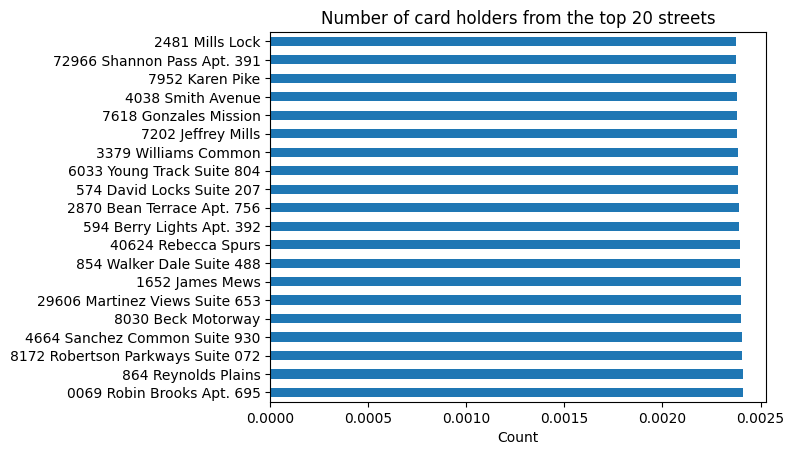

In [138]:
# Number of card holders per street
credit_df['street'].value_counts(normalize=True)[:20].plot(kind='barh', title='Number of card holders from the top 20 streets', \
                                            xlabel='Count')

In [139]:
credit_df['street'].value_counts()[5:].to_frame()

,street
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101
...,...
7281 Joshua Mills Apt. 077,7
3307 Ferguson Way,7
9599 Washington Field Suite 238,7
3437 Ross Flat Apt. 592,7


<AxesSubplot: title={'center': 'Number of card holders from the bottom 20 streets'}, xlabel='Count'>

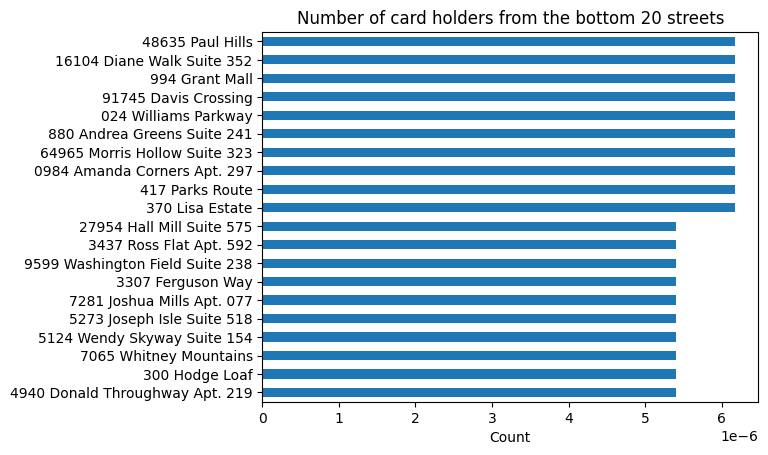

In [140]:
# Number of card holders per street
credit_df['street'].value_counts(normalize=True).nsmallest(20).plot(kind='barh', title='Number of card holders from the bottom 20 streets', \
                                            xlabel='Count')

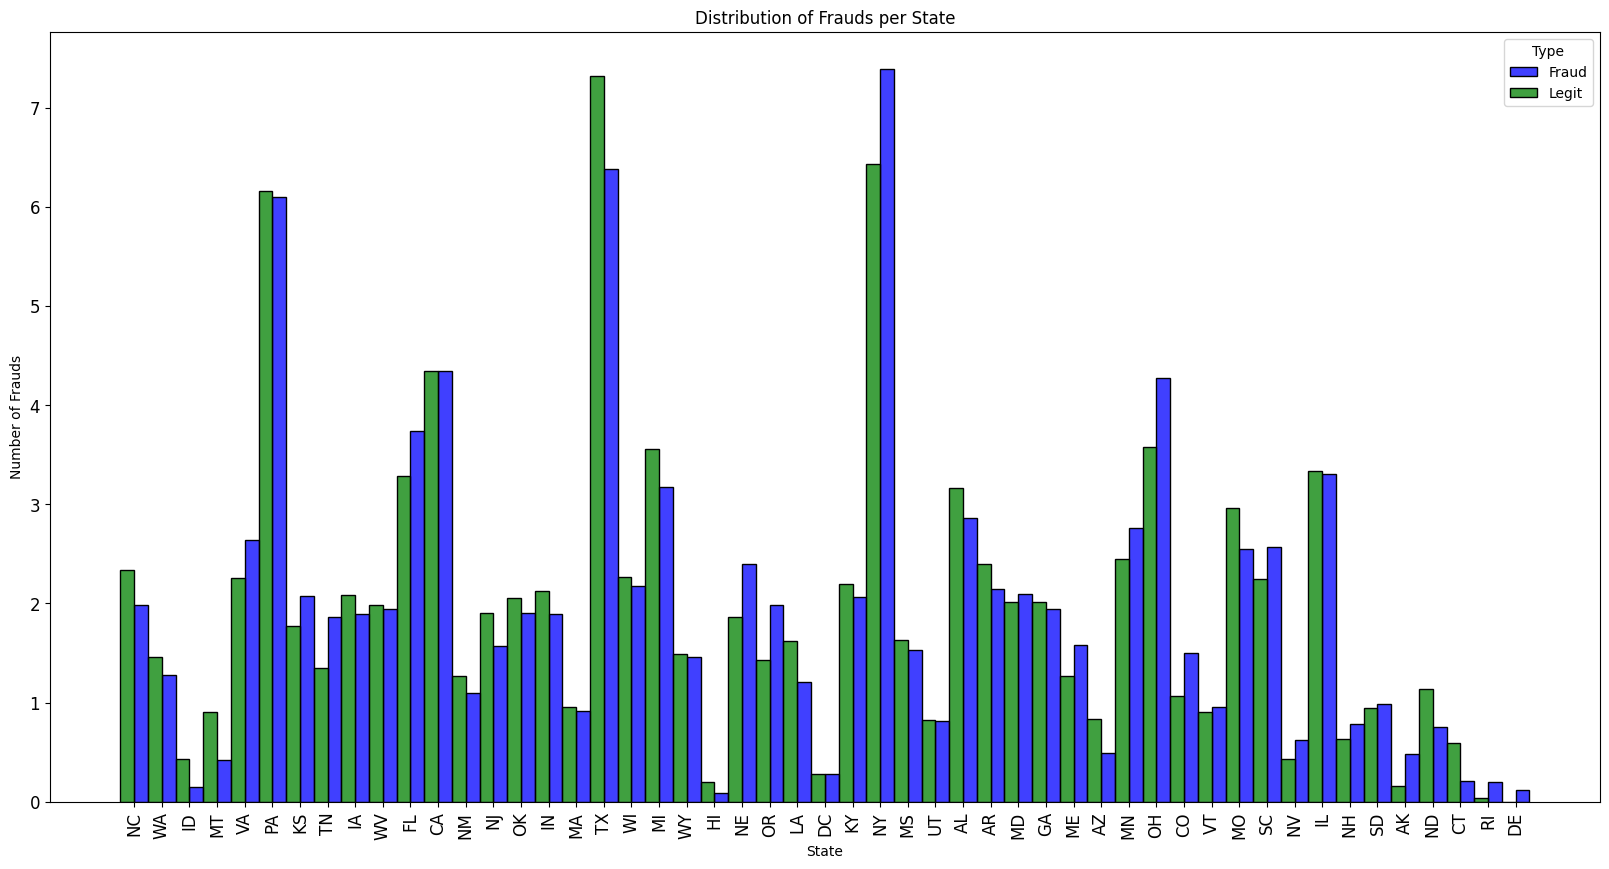

In [141]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each state
f, ax = plt.subplots(figsize=(20,10))
colors = ['green', 'blue']  # blue and green
sns.histplot(x='state', data=credit_df, hue='is_fraud', stat='percent',
             multiple='dodge', common_norm=False, palette=colors, ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', labels=['Fraud', 'Legit'])
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.title('Distribution of Frauds per State')
plt.show();

In [142]:
state_df = credit_df[credit_df['is_fraud'] == 1]

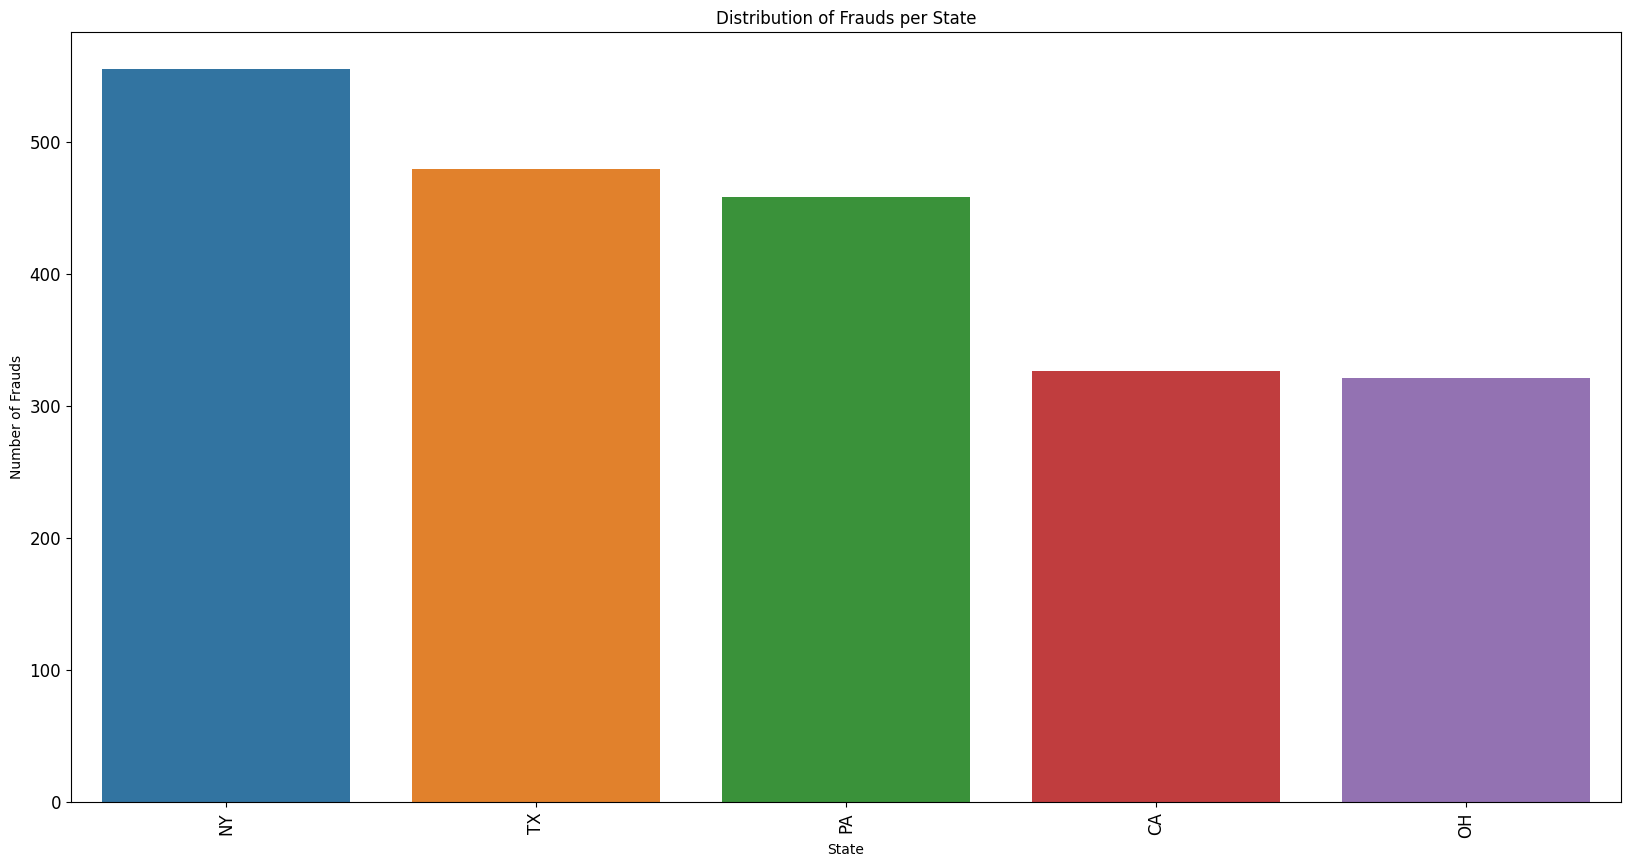

In [143]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each state
f, ax = plt.subplots(figsize=(20,10))
#colors = ['green', 'blue']  # blue and green
sns.countplot(x='state', data=state_df, \
              ax=ax, order=state_df['state'].value_counts().iloc[:5].index)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.title('Distribution of Frauds per State')
plt.show();

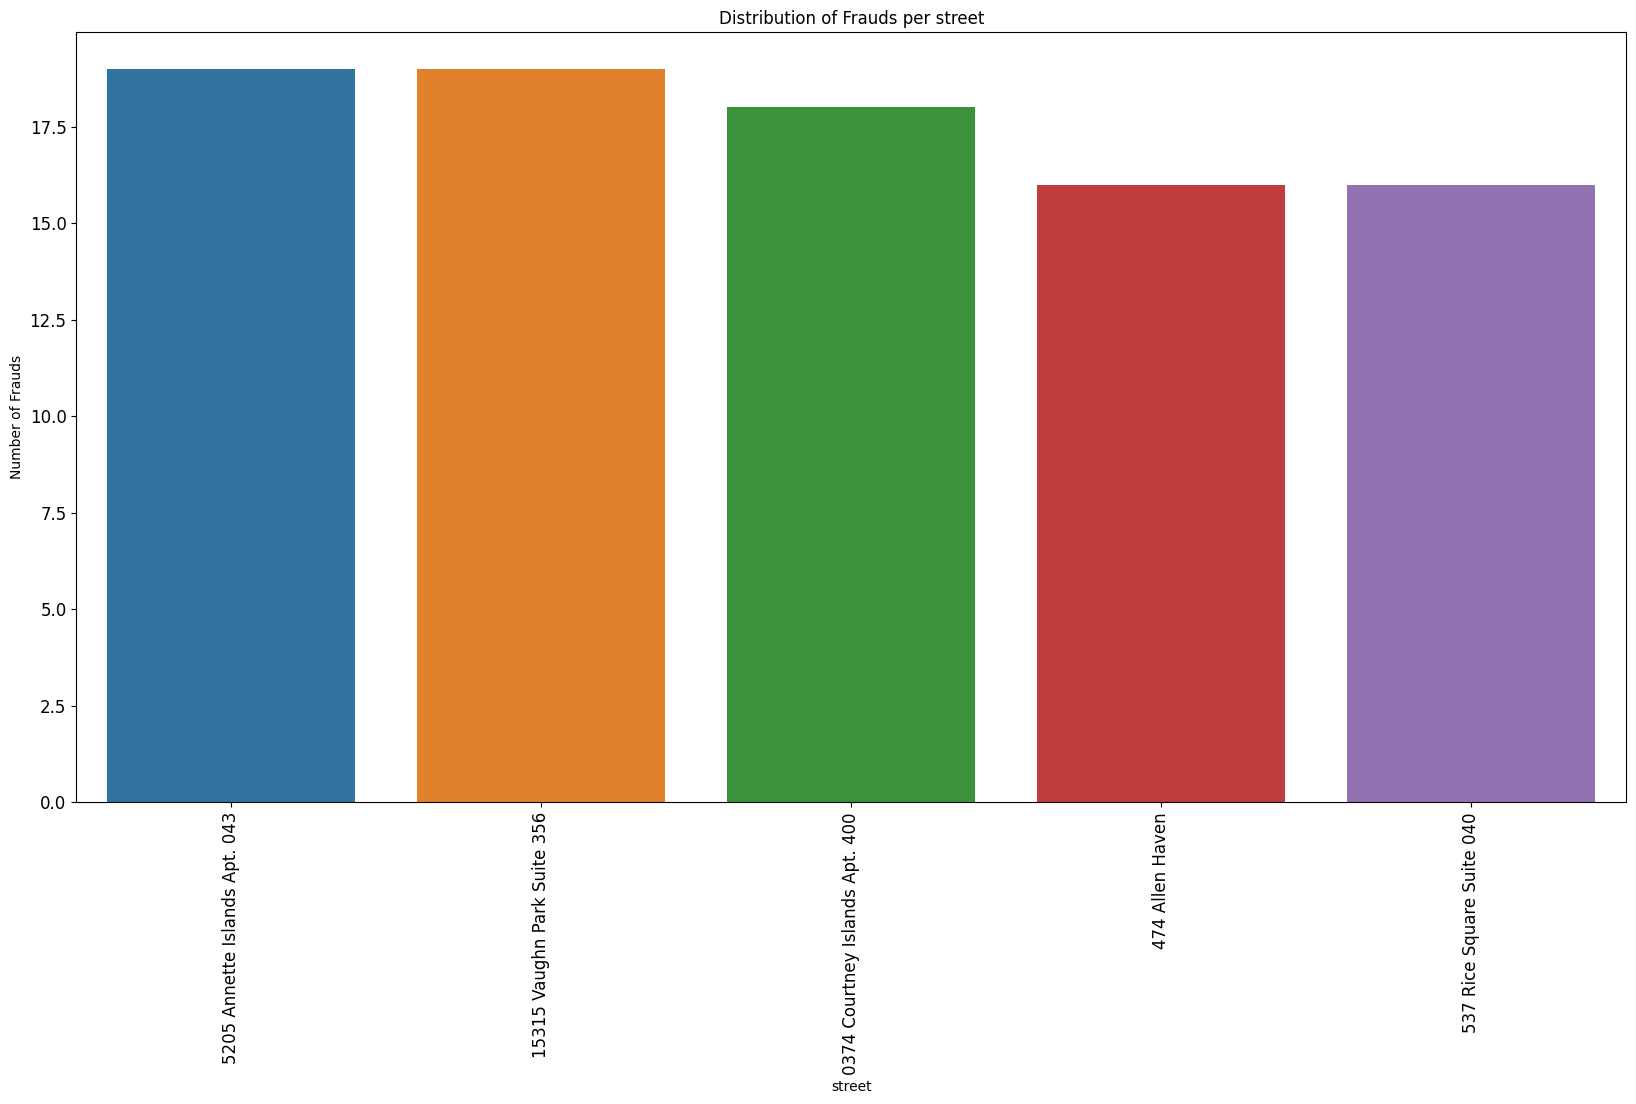

In [144]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each street
f, ax = plt.subplots(figsize=(20,10))
#colors = ['green', 'blue']  # blue and green
sns.countplot(x='street', data=state_df, \
              ax=ax, order=state_df['street'].value_counts().iloc[:5].index)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('street')
plt.ylabel('Number of Frauds')
plt.title('Distribution of Frauds per street')
plt.show();

## 6.4 Transaction locations

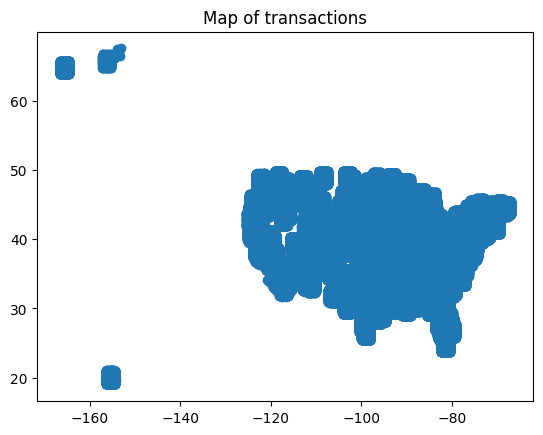

In [145]:
# Plotting a map of transactions
plt.scatter(x=credit_df['merch_long'], y=credit_df['merch_lat'])
plt.title('Map of transactions')
#plt.rcParams['figure.figsize'] = (100,70)
plt.show()

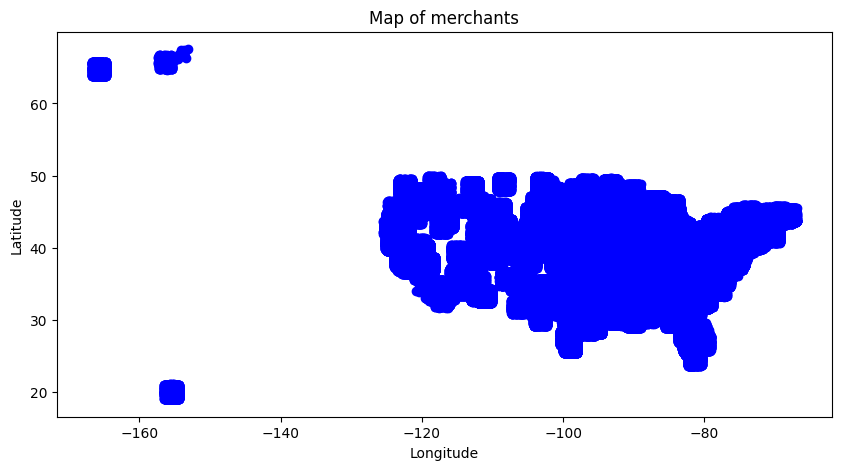

In [146]:
# Create a new plot
plt.figure(figsize=(10, 5))
lon = credit_df['merch_long']
lat = credit_df['merch_lat']

# Plot the data
plt.plot(lon, lat, 'bo')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of merchants')

# Show the plot
plt.show()

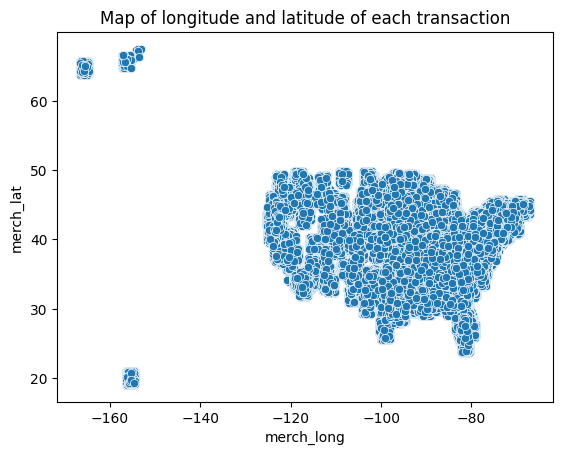

In [147]:
# Create a new plot
sns.scatterplot(x=credit_df['merch_long'], y=credit_df['merch_lat'])
plt.title("Map of longitude and latitude of each transaction")

# Show the plot
plt.show()

## 6.5 What gender does the most transactions.

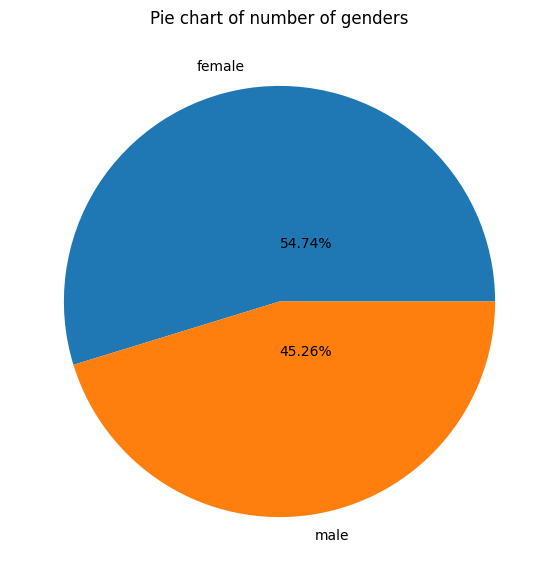

In [148]:
classes_train=credit_df['gender'].value_counts()
female_share_train=classes_train[0]/credit_df['gender'].count()*100
male_share_train=classes_train[1]/credit_df['gender'].count()*100

# Creating plot
labels = ['female', 'male']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels = labels)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of number of genders')
 
# show plot
plt.show()

## 6.6 Number of the genders that transactions have been flagged as fraud

In [149]:
fraud_df = credit_df[credit_df['is_fraud'] == 1]

In [150]:
fraud_df.head(2)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour,trans_month
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,...,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,01:06:37,1,1
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,...,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,01:47:29,1,1


In [151]:
fraud_df['gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

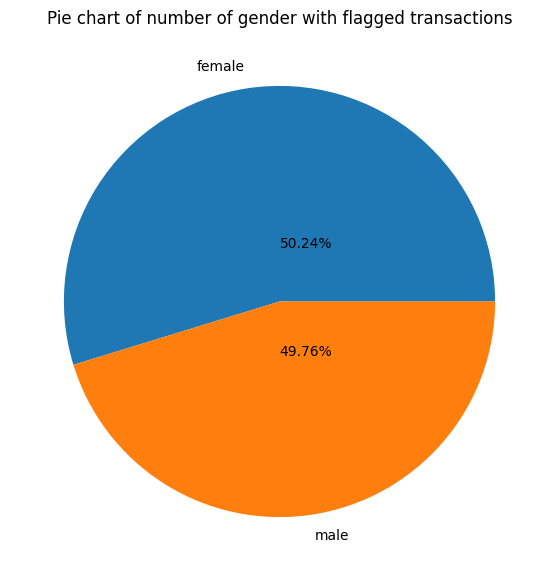

In [152]:
classes_train=fraud_df['gender'].value_counts()
female_share_train=classes_train[0]/fraud_df['gender'].count()*100
male_share_train=classes_train[1]/fraud_df['gender'].count()*100

# Creating plot
labels = ['female', 'male']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels = labels)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of number of gender with flagged transactions')
 
# show plot
plt.show()

## 6.7 Different types of merchants

In [153]:
credit_df['merchant'].value_counts().to_frame()

,merchant
fraud_Kilback LLC,4403
fraud_Cormier LLC,3649
fraud_Schumm PLC,3634
fraud_Kuhn LLC,3510
fraud_Boyer PLC,3493
...,...
"fraud_Douglas, DuBuque and McKenzie",775
fraud_Treutel-King,775
"fraud_Medhurst, Labadie and Gottlieb",759
fraud_Reichert-Weissnat,753


<AxesSubplot: title={'center': 'Top 20 Merchants'}, xlabel='Count'>

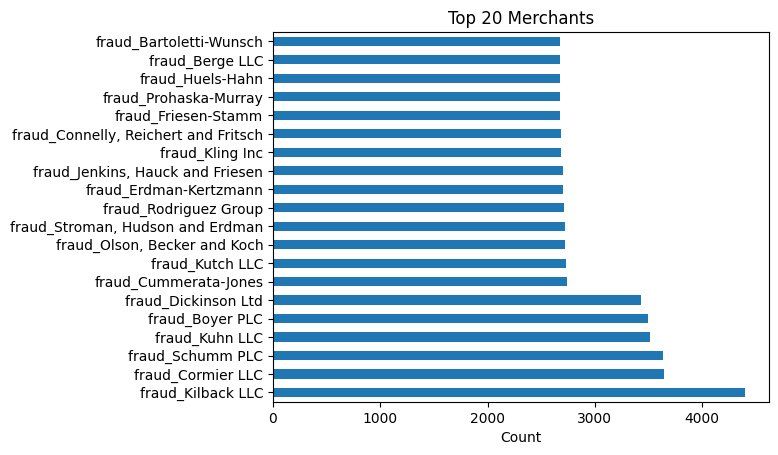

In [154]:
credit_df['merchant'].value_counts()[:20].plot(kind='barh', title='Top 20 Merchants', \
                                       xlabel='Count')

<AxesSubplot: title={'center': 'bottom 20 Merchants'}, xlabel='Count'>

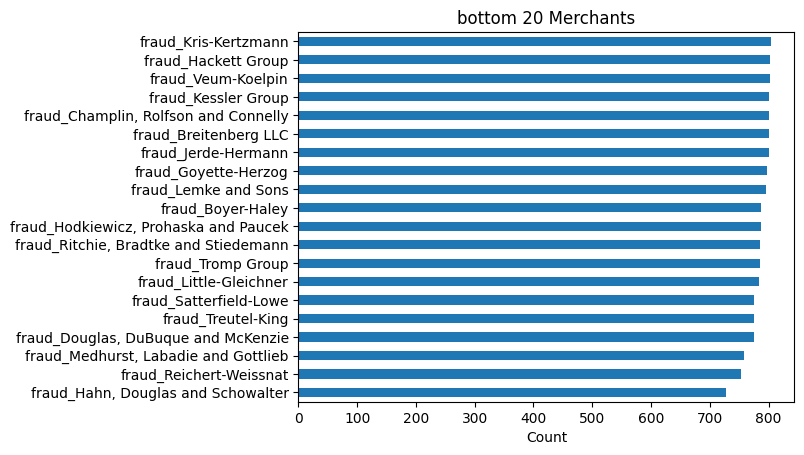

In [155]:
credit_df['merchant'].value_counts().nsmallest(20).plot(kind='barh', title='bottom 20 Merchants', \
                                       xlabel='Count')

## 6.8 Number of transactions per hour of the day.


<AxesSubplot: title={'center': 'Transactions per hour of the day'}, ylabel='Count'>

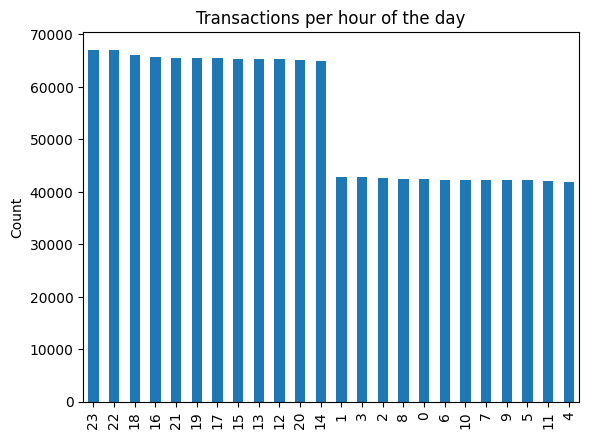

In [156]:
credit_df['hour'].value_counts().plot(kind='bar', title='Transactions per hour of the day', \
                                     ylabel='Count')

## 6.9 Jobs of the card holders.

In [157]:
# Count of the jobs
credit_df['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

<AxesSubplot: title={'center': 'Top 20 jobs'}, xlabel='Count'>

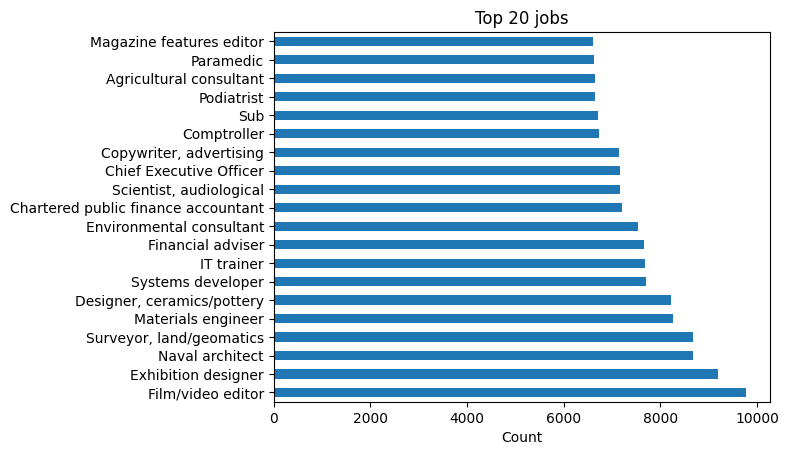

In [158]:
credit_df['job'].value_counts()[:20].plot(kind='barh', title='Top 20 jobs', \
                                       xlabel='Count')

<AxesSubplot: title={'center': 'Bottom 20 jobs'}, xlabel='Count'>

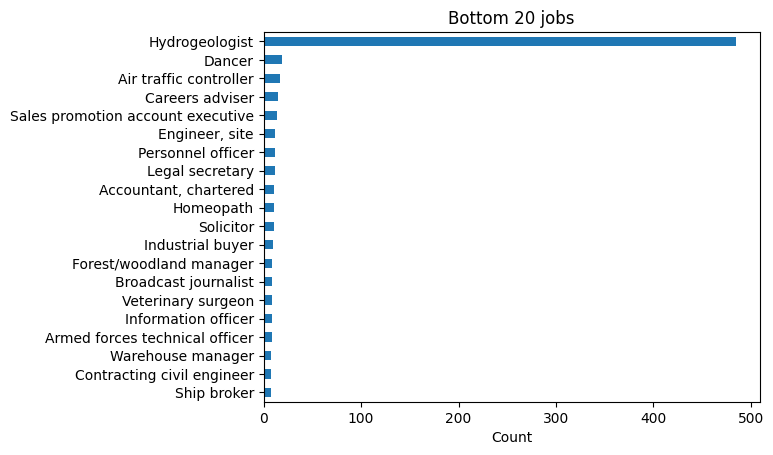

In [159]:
credit_df['job'].value_counts().nsmallest(20).plot(kind='barh', title='Bottom 20 jobs', \
                                       xlabel='Count')

In [160]:
# Grouping with the jobs column
job_df = credit_df.groupby(['job']).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_22472\2152011493.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_df = credit_df.groupby(['job']).mean()


In [161]:
job_df = job_df.sort_values(by='amt', ascending=False)

<AxesSubplot: title={'center': 'Top 20 jobs with the highest average transactions amount'}, xlabel='Count', ylabel='job'>

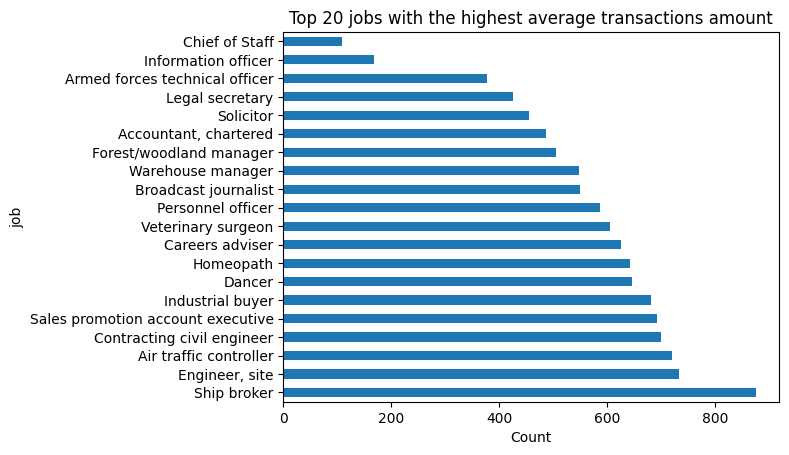

In [162]:
job_df['amt'][:20].plot(kind='barh', title='Top 20 jobs with the highest average transactions amount', \
                                xlabel='Count')

<AxesSubplot: title={'center': 'Top 20 jobs with the least average transactions amount'}, xlabel='Count', ylabel='job'>

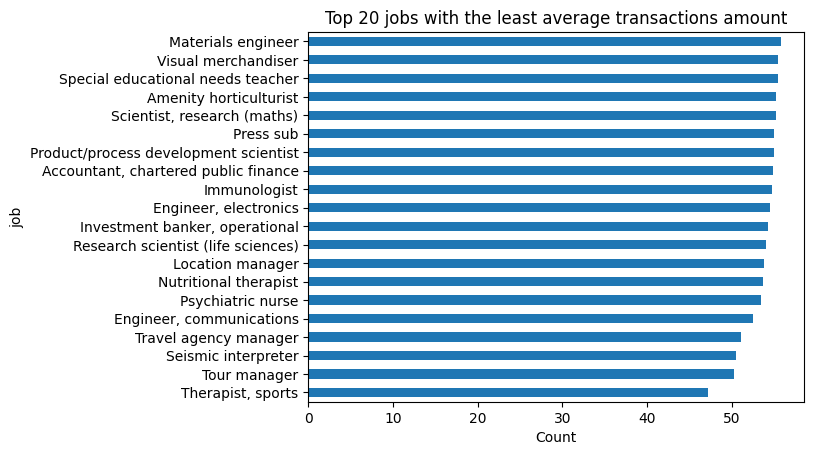

In [163]:
job_df['amt'].nsmallest(20).plot(kind='barh', title='Top 20 jobs with the least average transactions amount', \
                                xlabel='Count')

## 6.10 Jobs with most fraudsters

<AxesSubplot: title={'center': 'Jobs with the most fraudsters'}, xlabel='Count'>

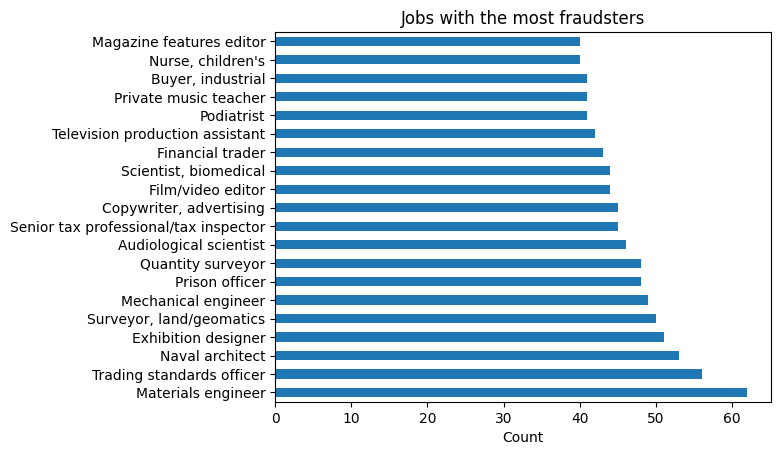

In [164]:
fraud_df['job'].value_counts()[:20].plot(kind='barh', title='Jobs with the most fraudsters', xlabel='Count')

<AxesSubplot: title={'center': 'Jobs with the least fraudsters'}, xlabel='Count'>

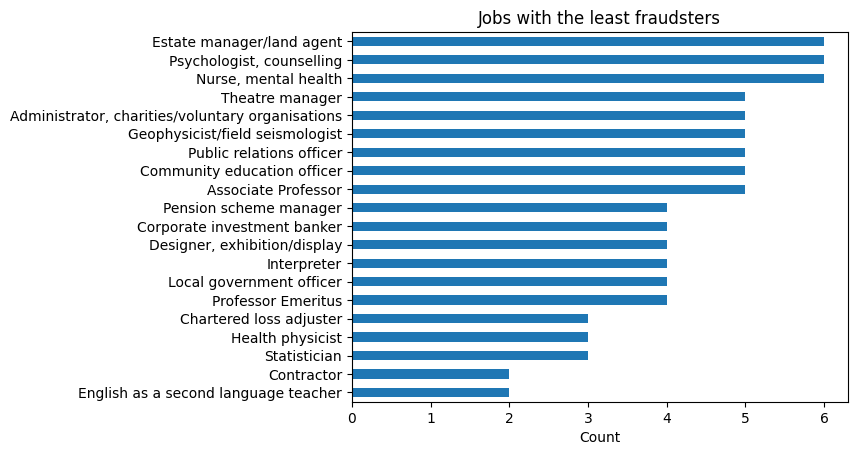

In [165]:
fraud_df['job'].value_counts().nsmallest(20).plot(kind='barh', title='Jobs with the least fraudsters', xlabel='Count')

## 6.11 Ages of the card holders

In [166]:
# calculating the ages
today = datetime.today()

credit_df['age'] = today - credit_df['dob']

In [167]:
credit_df['age'] = credit_df['age'].dt.days

In [168]:
credit_df['age'] = credit_df['age'] / 365

In [169]:
credit_df['age'] = credit_df['age'].astype(int)

In [170]:
credit_df['age'].value_counts()

38    43102
35    42112
47    39931
50    39789
32    35367
      ...  
89     1557
80     1517
85     1054
98      536
97       11
Name: age, Length: 80, dtype: int64

In [171]:
#creating the ge column for the test dataset
credit_test_df['age'] = today - credit_test_df['dob']
credit_test_df['age'] = credit_test_df['age'].dt.days
credit_test_df['age'] = credit_test_df['age'] / 365
credit_test_df['age'] = credit_test_df['age'].astype(int)
credit_test_df['age'].value_counts()

38    18260
35    17831
50    17174
47    17060
51    15150
      ...  
91      867
80      696
89      643
85      419
98      199
Name: age, Length: 79, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_22472\1445435544.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  credit_df['age'].value_counts()[:10].plot(kind='bar', title='Top 40 Ages of card holders', xlabel='Count')


<AxesSubplot: title={'center': 'Top 40 Ages of card holders'}, xlabel='Count'>

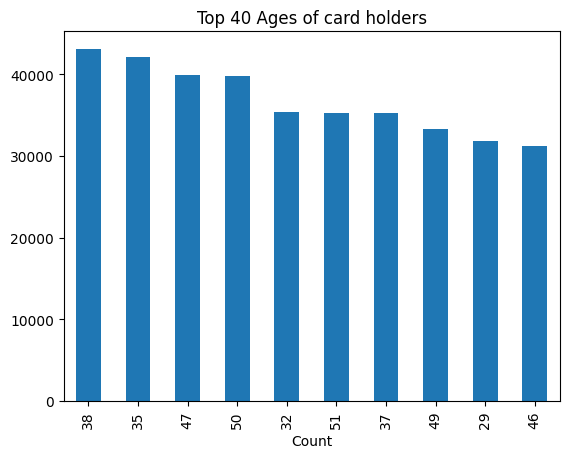

In [172]:
credit_df['age'].value_counts()[:10].plot(kind='bar', title='Top 40 Ages of card holders', xlabel='Count')

<AxesSubplot: title={'center': 'Bottom 40 Ages of card holders'}, xlabel='Count'>

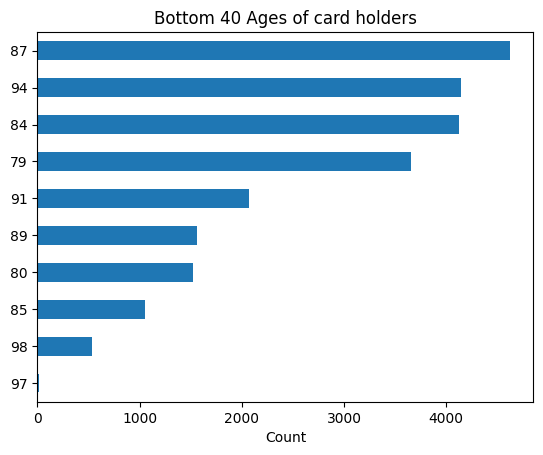

In [173]:
credit_df['age'].value_counts().nsmallest(10).plot(kind='barh', title='Bottom 40 Ages of card holders', xlabel='Count')

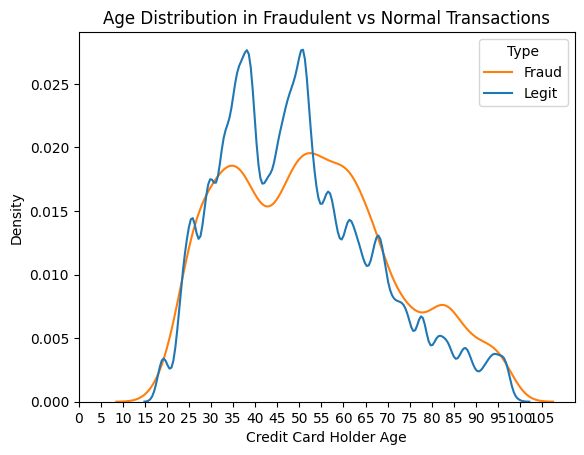

In [174]:
#age vs fraud
import datetime as dt
credit_df['age']=dt.date.today().year-pd.to_datetime(credit_df['dob']).dt.year
ax=sns.kdeplot(x='age',data=credit_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Normal Transactions')
plt.legend(title='Type', labels=['Fraud', 'Legit'])

## 6.12 Categories and average amount spend

In [175]:
credit_df['category'].value_counts().to_frame()

,category
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758
health_fitness,85879


<AxesSubplot: title={'center': 'Count of categories'}, ylabel='Count'>

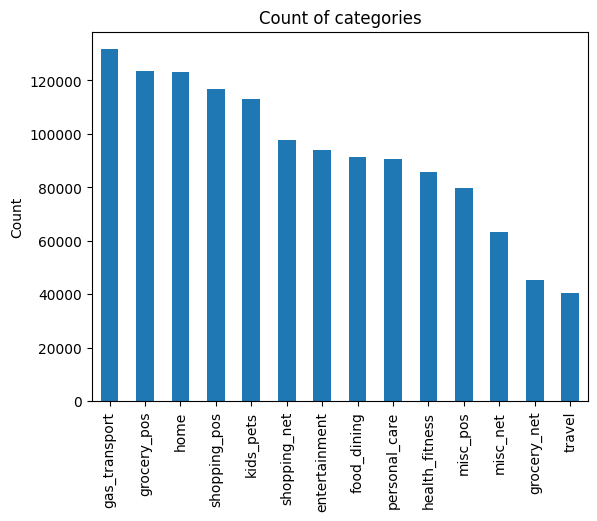

In [176]:
credit_df['category'].value_counts().plot(kind='bar', title='Count of categories', ylabel='Count')

In [177]:
category_df = credit_df.groupby(['category']).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_22472\1244162164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_df = credit_df.groupby(['category']).mean()


In [178]:
category_df['amt'] = category_df['amt'].astype(int)

<AxesSubplot: title={'center': 'Average amount spent per category'}, xlabel='category', ylabel='Average amount'>

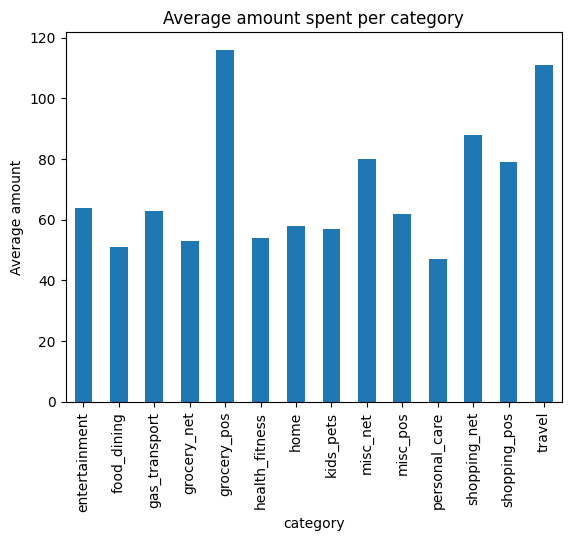

In [179]:
category_df['amt'].plot(kind='bar', title='Average amount spent per category', ylabel='Average amount')

In [180]:
#Random forest, decision trees, support vector machine, logistic regresssion.

# Account numbers

In [181]:
credit_df['cc_num'].value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

# 7. Data Preprocessing

C:\Users\User\AppData\Local\Temp\ipykernel_22472\1659085998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = credit_test_df.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_22472\1659085998.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_test_df.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);


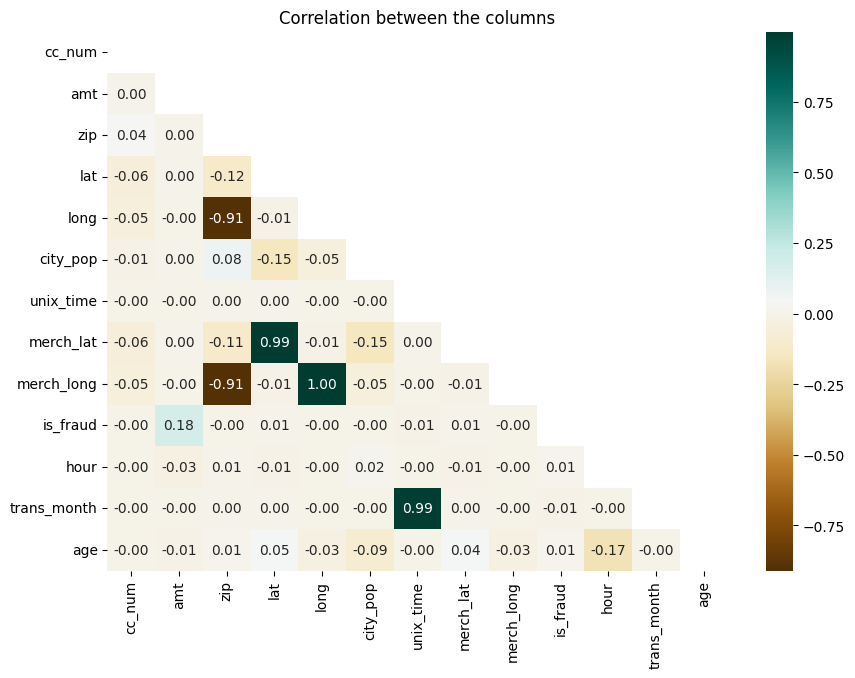

In [182]:
corr = credit_test_df.corr()

plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(credit_test_df.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

In [183]:
credit_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'hour', 'trans_month', 'age'],
      dtype='object')

In [184]:
credit_test_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'hour', 'trans_month', 'age'],
      dtype='object')

In [185]:
# Dropping variables not useful for model building

drop_cols = ['city','lat','long','job','dob','merch_lat','merch_long','trans_date', 'merchant', 'first', 'last', 'unix_time',\
            'trans_time', 'trans_num']

credit_df = credit_df.drop(drop_cols,axis=1)
credit_test_df = credit_test_df.drop(drop_cols,axis=1)

credit_df.head(2)

,cc_num,category,amt,gender,street,state,zip,city_pop,is_fraud,hour,trans_month,age
0,2703186189652095,misc_net,4.97,F,561 Perry Cove,NC,28654,3495,0,0,1,35
1,630423337322,grocery_pos,107.23,F,43039 Riley Greens Suite 393,WA,99160,149,0,0,1,45


In [186]:
#Binary mapping on Gender
  
credit_df['gender'] = credit_df['gender'].map({'M': 1, 'F': 0})
credit_test_df['gender'] = credit_test_df['gender'].map({'M': 1, 'F': 0})

credit_df.head(2)

,cc_num,category,amt,gender,street,state,zip,city_pop,is_fraud,hour,trans_month,age
0,2703186189652095,misc_net,4.97,0,561 Perry Cove,NC,28654,3495,0,0,1,35
1,630423337322,grocery_pos,107.23,0,43039 Riley Greens Suite 393,WA,99160,149,0,0,1,45


In [187]:
credit_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,cc_num,amt,gender,zip,city_pop,is_fraud,hour,trans_month,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.525513e-01,4.880067e+04,8.882444e+04,5.788652e-03,1.280486e+01,6.142150e+00,4.974255e+01
std,1.308806e+18,1.603160e+02,4.977437e-01,2.689322e+04,3.019564e+05,7.586269e-02,6.817824e+00,3.417703e+00,1.737848e+01
min,6.041621e+10,1.000000e+00,0.000000e+00,1.257000e+03,2.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
25%,1.800429e+14,9.650000e+00,0.000000e+00,2.623700e+04,7.430000e+02,0.000000e+00,7.000000e+00,3.000000e+00,3.600000e+01
50%,3.521417e+15,4.752000e+01,0.000000e+00,4.817400e+04,2.456000e+03,0.000000e+00,1.400000e+01,6.000000e+00,4.800000e+01
75%,4.642255e+15,8.314000e+01,1.000000e+00,7.204200e+04,2.032800e+04,0.000000e+00,1.900000e+01,9.000000e+00,6.100000e+01
90%,6.573561e+15,1.366700e+02,1.000000e+00,8.502000e+04,1.861400e+05,0.000000e+00,2.200000e+01,1.200000e+01,7.400000e+01
95%,4.497914e+18,1.963100e+02,1.000000e+00,9.456900e+04,5.257130e+05,0.000000e+00,2.300000e+01,1.200000e+01,8.400000e+01
99%,4.890424e+18,5.459926e+02,1.000000e+00,9.830400e+04,1.577385e+06,0.000000e+00,2.300000e+01,1.200000e+01,9.500000e+01


In [188]:
# # Creating dummy variables for Category

# df_train = pd.get_dummies(credit_df,columns=['category'],drop_first=True)
# df_test = pd.get_dummies(credit_test_df,columns=['category'],drop_first=True)

# df_train.info()

In [ ]:
# Creating dummy variables for Category

df_train = pd.get_dummies(credit_df,columns=['category'],drop_first=True)
df_test = pd.get_dummies(credit_test_df,columns=['category'],drop_first=True)

df_train.info()

In [ ]:
#convert category to dummy variables
train=pd.get_dummies(train, columns=['Merchant Category'], drop_first=True)
y_train=train[train['Is Fraud']]
X_train=train[train.drop("Is Fraud", axis='columns')]

In [189]:
# binary encoding
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(credit_df.loc[:,['street', 'state']])

credit_df.loc[:, ['street', 'state']] = enc.transform(credit_df[['street', 'state']])

C:\Users\User\AppData\Local\Temp\ipykernel_22472\3279594849.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_df.loc[:, ['street', 'state']] = enc.transform(credit_df[['street', 'state']])


In [190]:
# binary encoding
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(credit_test_df.loc[:,['street', 'state']])

credit_test_df.loc[:, ['street', 'state']] = enc.transform(credit_test_df[['street', 'state']])

C:\Users\User\AppData\Local\Temp\ipykernel_22472\4011074656.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_test_df.loc[:, ['street', 'state']] = enc.transform(credit_test_df[['street', 'state']])


In [191]:
credit_df.head(5)

,cc_num,category,amt,gender,street,state,zip,city_pop,is_fraud,hour,trans_month,age
0,2703186189652095,misc_net,4.97,0,568,27,28654,3495,0,0,1,35
1,630423337322,grocery_pos,107.23,0,435,47,99160,149,0,0,1,45
2,38859492057661,entertainment,220.11,1,602,13,83252,4154,0,0,1,61
3,3534093764340240,gas_transport,45.00,1,930,26,59632,1939,0,0,1,56
4,375534208663984,misc_pos,41.96,1,418,45,24433,99,0,0,1,37


In [192]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

credit_df['category'] = le.fit_transform(credit_df.category.values)
credit_test_df['category'] = le.fit_transform(credit_test_df.category.values)

In [193]:
# Splitting train and test dataset into X and y

X_train = credit_df.drop(['is_fraud'],axis=1)
y_train = credit_df['is_fraud']

X_test = credit_test_df.drop(['is_fraud'],axis=1)
y_test = credit_test_df['is_fraud']

In [194]:
# Dealing with the class imbalance

X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_smote).items()))

[(0, 1289169), (1, 1289169)]


In [195]:
X_train_smote.head(5)

,cc_num,category,amt,gender,street,state,zip,city_pop,hour,trans_month,age
0,2703186189652095,8,4.97,0,568,27,28654,3495,0,1,35
1,630423337322,4,107.23,0,435,47,99160,149,0,1,45
2,38859492057661,0,220.11,1,602,13,83252,4154,0,1,61
3,3534093764340240,2,45.00,1,930,26,59632,1939,0,1,56
4,375534208663984,9,41.96,1,418,45,24433,99,0,1,37


# 8. Modeling

## 8.1 Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the model
logreg = LogisticRegression(random_state=0)

# Fit the model on the training data
logreg.fit(X_train_smote, y_train_smote)

# Predict target values for the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_1 = accuracy_score(y_test, y_pred_logreg)
f1_score_1 = f1_score(y_test, y_pred_logreg, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9961401355721147
F1 score of Baseline Model (Logistic Regression): 0.9942139351987217


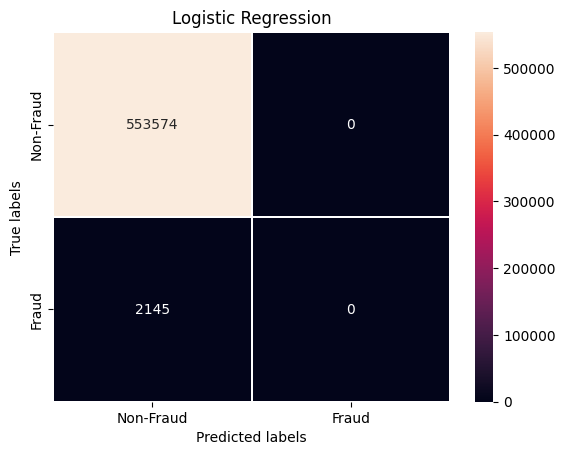

In [197]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve

# plotting a confusion matrix 
confus_matrix_log= confusion_matrix(y_test, y_pred_logreg)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [198]:
report_lr = classification_report(y_test, y_pred_logreg)
print(report_lr)

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
# Training accuracy score
print('Train:', logreg.score(X_train, y_train))
print()
print('Test:', logreg.score(X_test, y_test))

Train: 0.9942113482561166

Test: 0.9961401355721147


## 8.2 Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve

rf = RandomForestClassifier(n_estimators=10, max_depth=5, 
                            max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)

In [201]:
rf.fit(X_train_smote, y_train_smote)

C:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [202]:
y_pred_rf = rf.predict(X_test)

In [203]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9961401355721147
F1 score of Baseline Model (Logistic Regression): 0.9942139351987217


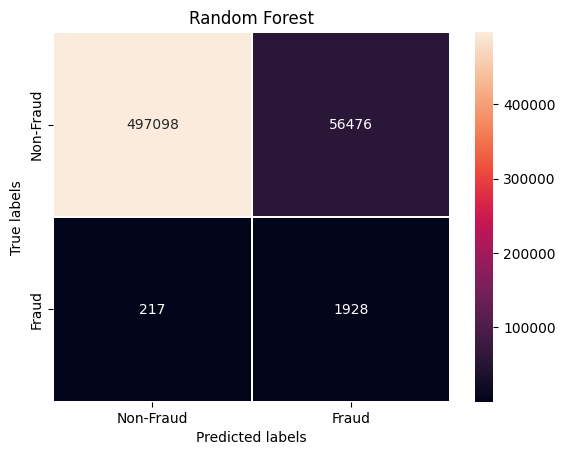

In [204]:
# plotting a confusion matrix 
confus_matrix_log= confusion_matrix(y_test, y_pred_rf)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [205]:
# Training accuracy score
print('Train:', rf.score(X_train, y_train))
print()
print('Test:', rf.score(X_test, y_test))

Train: 0.897556442439316

Test: 0.8979826135151039


In [206]:
report_lr = classification_report(y_test, y_pred_rf)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.90      0.06      2145

    accuracy                           0.90    555719
   macro avg       0.52      0.90      0.50    555719
weighted avg       1.00      0.90      0.94    555719



In [227]:
print('The precision score is: %.3f' % precision_score(y_test, y_pred_rf))

The precision score is: 0.033


In [228]:
print('The recall score is: %.3f' % recall_score(y_test, y_pred_rf))

The recall score is: 0.899


In [ ]:
fraud = credit_train_df['Is Fraud']
credit_train_df = credit_train_df.drop(columns='Is Fraud')

credit_train_df = pd.concat([credit_train_df, fraud], ignore_index=True)

### Predicting with the saved model

In [207]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [208]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [209]:
print(result)

0.8979826135151039


In [210]:
results = pd.DataFrame(loaded_model.predict(X_test))

In [226]:
results

,0
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


## 8.3 Decision Trees

In [212]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt = DecisionTreeClassifier(random_state = 42)

# Fit the model to the training data
dt.fit(X_train_smote, y_train_smote)

# Predict the classes on the test data
y_pred_dt = dt.predict(X_test)

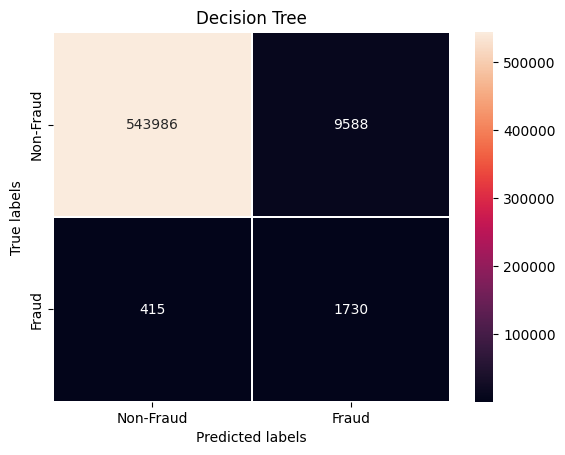

In [213]:
confus_matrix_log= confusion_matrix(y_test, y_pred_dt)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [214]:
accuracy_rf = accuracy_score(y_test, y_pred_dt)
f1_score_rf = f1_score(y_test, y_pred_dt, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9961401355721147
F1 score of Baseline Model (Logistic Regression): 0.9942139351987217


In [215]:
# Training accuracy score
print('Train:', dt.score(X_train_smote, y_train_smote))
print()
print('Test:', dt.score(X_test, y_test))

Train: 1.0

Test: 0.9819998956307054


In [216]:
report_lr = classification_report(y_test, y_pred_dt)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.81      0.26      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.89      0.62    555719
weighted avg       1.00      0.98      0.99    555719



## 8.4 SVM

In [217]:
# from sklearn import svm

# classifier = svm.SVC(kernel='linear')

In [218]:
# classifier.fit(X_train_smote, y_train_smote)
# y_pred_svm = classifier.predict(X_test)

In [219]:
# confus_matrix_log= confusion_matrix(y_test, y_pred_svm)

# #plt.figure(figsize= (10,8))
# ax= plt.subplot()
# sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Logistic Regression'); 
# ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

## 8.5 KNN

In [220]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score


# # Instantiatethe classifier model with n-neighbours of 3
# knn = KNeighborsClassifier(n_neighbors=3)

# # fitting the model
# knn.fit(X_train_smote, y_train_smote)

# # #performing the cross val score
# # knn_cross_val = cross_val_score(knn, X_train_smote, y_train_smote, cv=3, scoring='accuracy')
# print(knn_cross_val)

In [221]:
# y_pred_knn = knn.predict(X_test)

In [222]:
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# f1_score_knn = f1_score(y_test, y_pred_knn, average="weighted")
# print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
# print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

In [223]:
# confus_matrix_log= confusion_matrix(y_test, y_pred_knn)

# #plt.figure(figsize= (10,8))
# ax= plt.subplot()
# sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('K Nearest Neighbors'); 
# ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [224]:
# Training accuracy score
# print('Train:', knn.score(X_train_smote, y_train_smote))
# print()
# print('Test:', knn.score(X_test, y_test))

In [225]:
# report_lr = classification_report(y_test, y_pred_knn)
# print(report_lr)